In [2]:
# imports
%matplotlib inline
# %pylab osx
import os
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx
plt.style.use('ggplot')

## Local Minima/Optima
One pitfall of gradient descent is that some functions contain "minima", which is another way of saying a trough, or a concave point, or put another way, a dip in a function.

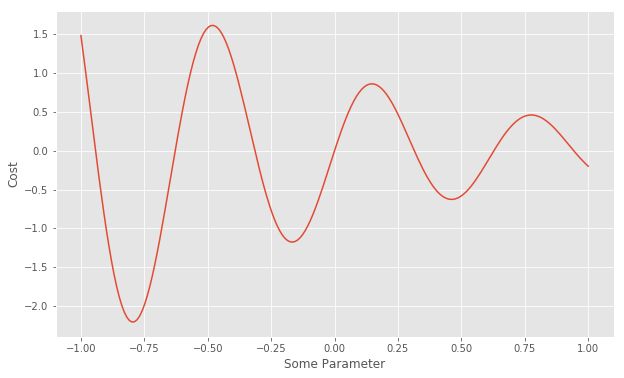

In [3]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca()
x = np.linspace(-1, 1, 200)
hz = 10
cost = np.sin(hz*x)*np.exp(-x)
ax.plot(x, cost)
ax.set_ylabel('Cost')
ax.set_xlabel('Some Parameter')

In [4]:
gradient = np.diff(cost)

Mimic the local minima

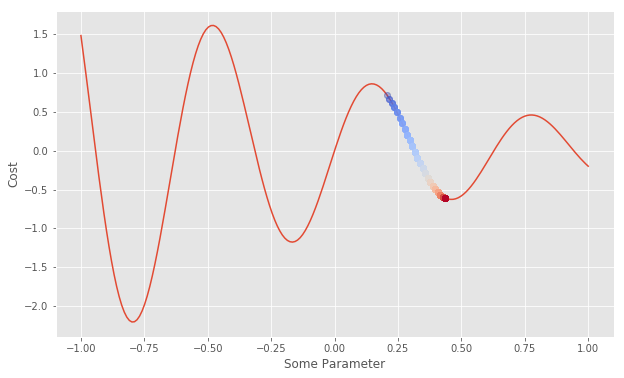

In [10]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca()
x = np.linspace(-1, 1, 200)
hz = 10
cost = np.sin(hz*x)*np.exp(-x)
ax.plot(x, cost)
ax.set_ylabel('Cost')
ax.set_xlabel('Some Parameter')
n_iterations = 500
cmap = plt.get_cmap('coolwarm')
c_norm = colors.Normalize(vmin=0, vmax=n_iterations)
scalar_map = cmx.ScalarMappable(norm=c_norm, cmap=cmap)
init_p = 120#np.random.randint(len(x)*0.2, len(x)*0.8)
learning_rate = 1.0
for iter_i in range(n_iterations):
    init_p -= learning_rate * gradient[int(init_p)]
    ax.plot(x[int(init_p)], cost[int(init_p)], 'ro', alpha=(iter_i + 1) / n_iterations, color=scalar_map.to_rgba(iter_i))

We can only get the -0.5 as our lostest cost, but that is the local minima.

Also, the figure above is just one parameter.

But we got a lot of parameter, we take another example for 2 parameter below.

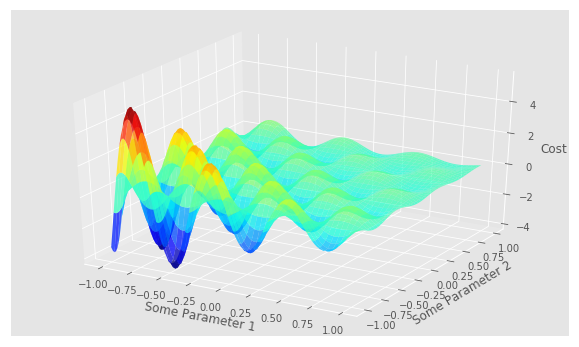

In [11]:
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
x, y = np.mgrid[-1:1:0.02, -1:1:0.02]
X, Y, Z = x, y, np.sin(hz*x)*np.exp(-x)*np.cos(hz*y)*np.exp(-y)
ax.plot_surface(X, Y, Z, rstride=2, cstride=2, alpha=0.75, cmap='jet', shade=False)
ax.set_xlabel('Some Parameter 1')
ax.set_ylabel('Some Parameter 2')
ax.set_zlabel('Cost')

## Learning Rate
Try to see if highter learning rate will break the local minima

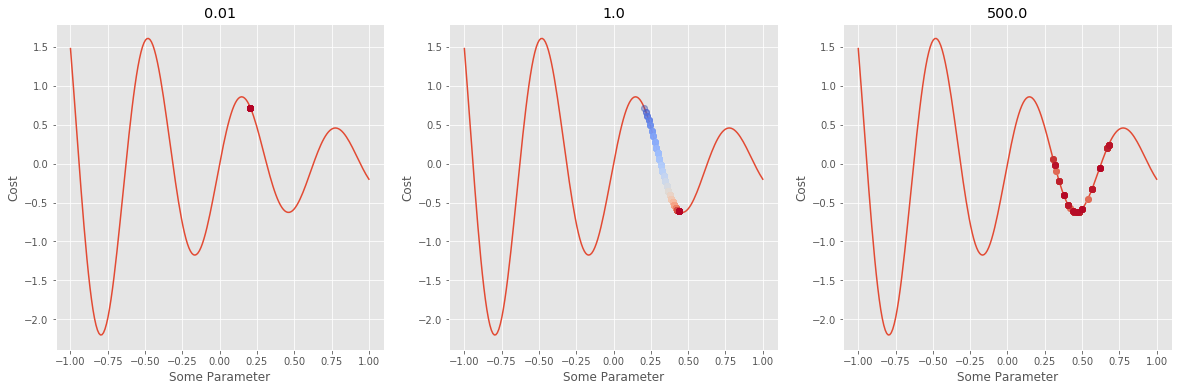

In [16]:
fig, axs = plt.subplots(1, 3, figsize=(20, 6))
for rate_i, learning_rate in enumerate([0.01, 1.0, 500.0]):
    ax = axs[rate_i]
    x = np.linspace(-1, 1, 200)
    hz = 10
    cost = np.sin(hz*x)*np.exp(-x)
    ax.plot(x, cost)
    ax.set_ylabel('Cost')
    ax.set_xlabel('Some Parameter')
    ax.set_title(str(learning_rate))
    n_iterations = 500
    cmap = plt.get_cmap('coolwarm')
    c_norm = colors.Normalize(vmin=0, vmax=n_iterations)
    scalar_map = cmx.ScalarMappable(norm=c_norm, cmap=cmap)
    init_p = 120#np.random.randint(len(x)*0.2, len(x)*0.8)
    for iter_i in range(n_iterations):
        init_p -= learning_rate * gradient[int(init_p)]
        ax.plot(x[int(init_p)], cost[int(init_p)], 'ro', alpha=(iter_i + 1) / n_iterations, color=scalar_map.to_rgba(iter_i))

## Creating a Neural Network

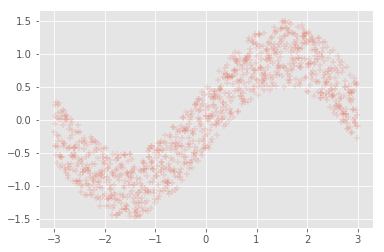

In [17]:
# Let's create some toy data

# We are going to say that we have seen 1000 values of some underlying representation that we aim to discover
n_observations = 1000

# Instead of having an image as our input, we're going to have values from -3 to 3.  This is going to be the input to our network.
xs = np.linspace(-3, 3, n_observations)

# From this input, we're going to teach our network to represent a function that looks like a sine wave.  To make it difficult, we are going to create a noisy representation of a sine wave by adding uniform noise.  So our true representation is a sine wave, but we are going to make it difficult by adding some noise to the function, and try to have our algorithm discover the underlying cause of the data, which is the sine wave without any noise.
ys = np.sin(xs) + np.random.uniform(-0.5, 0.5, n_observations)
plt.scatter(xs, ys, alpha=0.15, marker='+')


In [19]:
# variables which we need to fill in when we are ready to compute the graph.
# We'll pass in the values of the x-axis to a placeholder called X.
X = tf.placeholder(tf.float32, name='X')

# And we'll also specify what the y values should be using another placeholder, y.
Y = tf.placeholder(tf.float32, name='Y')

(array([   9.,   25.,   83.,  174.,  259.,  224.,  143.,   61.,   19.,    3.]),
 array([-3.17581987, -2.52440057, -1.87298126, -1.22156196, -0.57014265,
         0.08127666,  0.73269596,  1.38411527,  2.03553457,  2.68695388,
         3.33837318]),
 <a list of 10 Patch objects>)

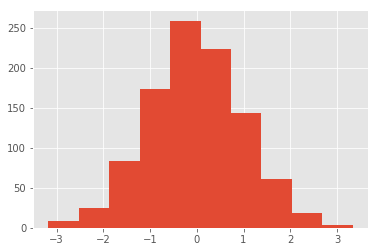

In [18]:
sess = tf.InteractiveSession()
n = tf.random_normal([1000]).eval()
plt.hist(n)

(array([  10.,   34.,  113.,  155.,  200.,  222.,  149.,   76.,   24.,   17.]),
 array([-0.278824  , -0.22279423, -0.16676446, -0.11073469, -0.05470492,
         0.00132485,  0.05735462,  0.11338439,  0.16941416,  0.22544393,
         0.2814737 ]),
 <a list of 10 Patch objects>)

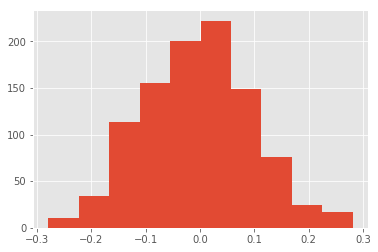

In [20]:
n = tf.random_normal([1000], stddev=0.1).eval()
plt.hist(n)

In [21]:
# To create the variables, we'll use tf.Variable, which unlike a placeholder, does not require us to define the value at the start of a run/eval.  It does need an initial value, which we'll give right now using the function tf.random_normal.  We could also pass an initializer, which is simply a function which will call the same function.  We'll see how that works a bit later.  In any case, the random_normal function just says, give me a random value from the "normal" curve.  We pass that value to a tf.Variable which creates a tensor object.
W = tf.Variable(tf.random_normal([1], dtype=tf.float32, stddev=0.1), name='weight')

# For bias variables, we usually start with a constant value of 0.
B = tf.Variable(tf.constant([0], dtype=tf.float32), name='bias')

# Now we can scale our input placeholder by W, and add our bias, b.
Y_pred = X * W + B

In [22]:
# this function will measure the absolute distance, also known as the l1-norm
def distance(p1, p2):
    return tf.abs(p1 - p2)

In [24]:
# and now we can take the output of our network and our known target value
# and ask for the distance between them
# cost = distance(Y_pred, tf.sin(X)) 

# we are going to sum up all the distance
cost = tf.reduce_mean(distance(Y_pred, Y))

## Train

In [25]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

/usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


0.505223
0.457521
0.434366
0.42312
0.418341
0.416494
0.415585
0.415098
0.414736
0.414504
0.414385
0.414341
0.414322
0.414309


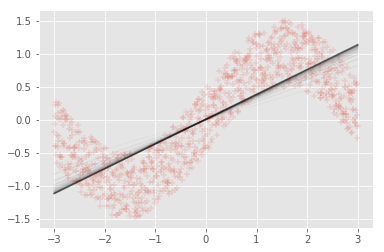

In [28]:
# We create a session to use the graph
n_iterations = 500

# Plot the true data distribution
fig, ax = plt.subplots(1, 1)
ax.scatter(xs, ys, alpha=0.15, marker='+')
with tf.Session() as sess:
    # Here we tell tensorflow that we want to initialize all
    # the variables in the graph so we can use them
    # This will set `W` and `b` to their initial random normal value.
    sess.run(tf.global_variables_initializer())

    # We now run a loop over epochs
    prev_training_cost = 0.0
    for it_i in range(n_iterations):
        sess.run(optimizer, feed_dict={X: xs, Y: ys})
        training_cost = sess.run(cost, feed_dict={X: xs, Y: ys})

        # every 10 iterations
        if it_i % 10 == 0:
            # let's plot the x versus the predicted y
            ys_pred = Y_pred.eval(feed_dict={X: xs}, session=sess)

            # We'll draw points as a scatter plot just like before
            # Except we'll also scale the alpha value so that it gets
            # darker as the iterations get closer to the end
            ax.plot(xs, ys_pred, 'k', alpha=it_i / n_iterations)
            fig.show()
            plt.draw()

            # And let's print our training cost: mean of absolute differences
            print(training_cost)

        # Allow the training to quit if we've reached a minimum
        if np.abs(prev_training_cost - training_cost) < 0.000001:
            break

        # Keep track of the training cost
        prev_training_cost = training_cost